# 선형회귀모델 공부
알려진 데이터 세트나 레이블이 지정된 데이터 세트에 대해 알고리즘을 훈련시킨 다음, 해당 알고리즘을 사용하여 알 수 없는 값을 예측하는 과정

## 선형회귀 모델의 가정
실제 데이터는 이전 예시보다 더 복잡하기 때문에 ,선형 회귀 분석은 다음 네 가지 가정을 충족하도록 데이터 값을 수학적으로 수정하거나 변환해야 함

- 선형 관계
<br> 독립 변수와 종속 변수 사이에는 선형 관계가 있어야 함. 이를 산점도를 만들어 직선을 따라 표시되는지 확인. 
<br>제곱근이나 로그와 같은 비선형 함수를 적용하여 두 변수 간의 선형 관계를 수학적으로 만들 수도 있음.

- 잔차 독립성
<br> 잔차를 사용하여 예측 정확도를 측정하는데, 이때 잔차 사이에 식별 가능한 패턴이 없어야 함. 
<br> Durbin-Watson 검정과 같은 다양한 수학 검정을 사용하여 잔차 독립성을 확인할 수 있음. 
<br>더미 데이터를 사용하여 계절 데이터와 같은 데이터 변형을 바꿀 수 있음.

- 정규성
<br>Q-Q 플롯 등을 활용해 잔차가 정규 분포를 따르는지 여부를 결정확인.(잔차가 그래프 중앙의 대각선을 따라 있어야 함) 
<br>잔차가 정규화되지 않은 경우 데이터에서 임의의 이상값이나 일반적이지 않은 값을 검정할 수 있음. 
<br>-> 이상치을 제거하거나 비선형 변환을 수행해 이를 해결 가능

- 등분산성
<br>등분산성은 잔차가 x의 모든 값에 대해 평균에서 일정한 분산을 갖는다고 가정함. 
<br>그렇지 않으면 분석 결과가 정확하지 않을 수 있고, 이 가정이 충족되지 않으면 종속 변수를 변경해야 할 수 있음. 
<br>분산은 대규모 데이터 세트에서 자연스럽게 발생하므로 종속 변수의 척도를 변경하는 것이 합리적.

## 종류
- 일반선형회귀: RSS를 최소화, 규제적용x
- 릿지(Ridge): L2규제 적용 -> (RSS + alpha * sum((W(회귀계수))^2))을 최소화 => 회귀 계수값의 크기 조정
- 라쏘(Lasso): L1규제 적용 -> (RSS + alpha * sum(abs(W(회귀계수))))를 최소화 => 영향력이 작은 회귀 계수값을 0으로 변환함(피처수 ↓)
- 엘라스틱넷(ElasticNet): L2,L1 규제 결합->  (RSS + alpha2 * sum((W(회귀계수))^2)+ alpha1 * sum(abs(W(회귀계수))))을 최소화 => L1을 통해 피처수를 줄이고, L2로 계수값의 크기를 조정
<br> + 로지스틱 회귀: 분류에 사용(이진 분류에 효과적)

## 평가지표
- MAE: Mean Absolute Error, (실제값-예측값)의 절대값의 평균 -> sum(abs(Y-Y_hat))/n
- RMSE: Root Mean Squared Error 오차(Y-Y_hat)의 제곱의 평균 -> sqrt(sum((Y-Y_hat)^2)/n)
- RMSLE: RMSE에 로그를 적용한 것 -> sqrt(sum((log(Y+1)-log(Y_hat+1))^2)/n)
- R^2: 실제값의 분산 대비 예측값의 분산 -> 예측값Var/ 실제값Var => 1− (총 변동 (TSS)/합 제곱 오차 (SSE))
- +MSE(루트 안씌운거), MSLE(루트 안씌운거 +로그)
- (MAE에 비해 RMSE는 큰 오류값이 있을 때 값이 더 커짐(패널티 부여))


# 라이브러리 호출
기본적인 라이브러리와 전처리 및 모델링에 사용할 라이브러리 호출

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%config inlineBackend.figure_format = 'retina' #선명하게 만들기

#한글폰트 가져오기
from matplotlib import rc
rc('font', family='NanumGothic')

# Warning 메세지를 뜨지 않게 해줌
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.linear_model import LinearRegression


# 데이터 불러오기

In [2]:
df = pd.read_csv('./data/SeoulBikeData_train.csv')
df

,Date,Rented Bike Count,Hour,Temperature(째C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(째C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,NaN,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,NaN,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8035,31/10/2018,1507,19,8.4,53,NaN,2000,-0.6,0.0,0.0,0.0,Autumn,No Holiday,Yes
8036,31/10/2018,1176,20,7.6,59,0.7,2000,0.0,0.0,0.0,0.0,NaN,No Holiday,Yes
8037,31/10/2018,1069,21,7.6,59,3.0,1929,0.0,0.0,0.0,0.0,Autumn,No Holiday,Yes
8038,31/10/2018,1088,22,6.8,58,2.2,1936,-0.9,0.0,0.0,0.0,Autumn,No Holiday,Yes


## 변수명이 잘못된 듯하여 수정

In [3]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(째C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(째C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [4]:
df.rename(columns={'Temperature(째C)':'Temperature(°C)','Dew point temperature(째C)':'Dew point temperature(°C)'},inplace=True)
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

## 기본 정보 확인
head, tail, info, describe, 결측치 확인

In [5]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,NaN,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,NaN,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [6]:
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8035,31/10/2018,1507,19,8.4,53,NaN,2000,-0.6,0.0,0.0,0.0,Autumn,No Holiday,Yes
8036,31/10/2018,1176,20,7.6,59,0.7,2000,0.0,0.0,0.0,0.0,NaN,No Holiday,Yes
8037,31/10/2018,1069,21,7.6,59,3.0,1929,0.0,0.0,0.0,0.0,Autumn,No Holiday,Yes
8038,31/10/2018,1088,22,6.8,58,2.2,1936,-0.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8039,31/10/2018,798,23,6.4,60,1.8,1930,-0.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [7]:
df.info() #결측치 존재

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8040 entries, 0 to 8039
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8040 non-null   object 
 1   Rented Bike Count          8040 non-null   int64  
 2   Hour                       8040 non-null   int64  
 3   Temperature(°C)            7240 non-null   float64
 4   Humidity(%)                8040 non-null   int64  
 5   Wind speed (m/s)           7238 non-null   float64
 6   Visibility (10m)           8040 non-null   int64  
 7   Dew point temperature(°C)  8040 non-null   float64
 8   Solar Radiation (MJ/m2)    8040 non-null   float64
 9   Rainfall(mm)               8040 non-null   float64
 10  Snowfall (cm)              8040 non-null   float64
 11  Seasons                    7238 non-null   object 
 12  Holiday                    8040 non-null   object 
 13  Functioning Day            8040 non-null   objec

In [8]:
df.isna().sum()

Date                           0
Rented Bike Count              0
Hour                           0
Temperature(°C)              800
Humidity(%)                    0
Wind speed (m/s)             802
Visibility (10m)               0
Dew point temperature(°C)      0
Solar Radiation (MJ/m2)        0
Rainfall(mm)                   0
Snowfall (cm)                  0
Seasons                      802
Holiday                        0
Functioning Day                0
dtype: int64

In [9]:
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8040.000000,8040.000000,7240.000000,8040.000000,7238.000000,8040.000000,8040.000000,8040.000000,8040.000000,8040.000000
mean,709.775995,11.500000,13.498564,58.271020,1.756756,1459.170896,4.522239,0.587072,0.152164,0.066493
std,657.320605,6.922617,12.270471,20.340492,1.045901,603.716284,13.393517,0.886186,1.127026,0.378182
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,43.000000,1.000000,977.000000,-4.600000,0.000000,0.000000,0.000000
50%,485.000000,11.500000,15.600000,57.000000,1.600000,1741.000000,6.400000,0.020000,0.000000,0.000000
75%,1080.500000,17.250000,23.300000,74.000000,2.400000,2000.000000,15.600000,0.960000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,5.100000


## Date변수 형태변환

In [10]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8040 entries, 0 to 8039
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8040 non-null   datetime64[ns]
 1   Rented Bike Count          8040 non-null   int64         
 2   Hour                       8040 non-null   int64         
 3   Temperature(°C)            7240 non-null   float64       
 4   Humidity(%)                8040 non-null   int64         
 5   Wind speed (m/s)           7238 non-null   float64       
 6   Visibility (10m)           8040 non-null   int64         
 7   Dew point temperature(°C)  8040 non-null   float64       
 8   Solar Radiation (MJ/m2)    8040 non-null   float64       
 9   Rainfall(mm)               8040 non-null   float64       
 10  Snowfall (cm)              8040 non-null   float64       
 11  Seasons                    7238 non-null   object        
 12  Holida

# 결측치처리
Seasons, Temperature(°C), Wind speed (m/s) 열에 있는 결측치 처리

## Seasons

In [11]:
#Seasons의 결측치 처리: 앞서 Date와 Hour를 통해 확인한 시계열 데이터라는 것을 이용해 결측치 처리
#전후 행의 Seasons를 확인하고 둘이 같으면 그 값으로 대체, 그렇지 않으면 결측치 그대로
df['Seasons'] = np.where(df['Seasons'].ffill() == df['Seasons'].bfill(), df['Seasons'].ffill(), np.nan)
print('Seasons열의 남은 결측치 수: ',df['Seasons'].isna().sum(),'\n결측치가 존재하는 행')
df[df['Seasons'].isna()] #남은 결측치 확인

Seasons열의 남은 결측치 수:  1 
결측치가 존재하는 행


,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,NaN,No Holiday,Yes


In [12]:
#남은 결측치가 첫행인 것을 확인하고 같은날인 다음행 값으로 대체함
df['Seasons'][0] = df['Seasons'][1]
print('Seasons열의 남은 결측치 수: ', df['Seasons'].isna().sum())

Seasons열의 남은 결측치 수:  0


## Temperature(°C)
기온은 시간에 따른 변동성이 적은 편이므로 전,후 값의 평균으로 대체
<br>=> 결측치가 최고, 최저치이면 원래값과 조금 다를 수 있겠지만, 큰 차이가 없을 것으로 예상

In [13]:
df['Temperature(°C)'] = df['Temperature(°C)'].fillna((df['Temperature(°C)'].shift() + df['Temperature(°C)'].shift(-1)) / 2)
print('Temperature열의 남은 결측치 수: ', df['Temperature(°C)'].isna().sum()) #여전히 결측치가 남아있음 => 결측치가 연속해서 있는 경우가 존재함

Temperature열의 남은 결측치 수:  156


In [14]:
#rolling 메서드를 이용해 이동평균으로 결측치 대체
window_size = 5
df['Temperature(°C)'] = df['Temperature(°C)'].fillna(df['Temperature(°C)'].rolling(window=window_size, min_periods=1, center=True).mean())
print('Temperature열의 남은 결측치 수: ', df['Temperature(°C)'].isna().sum()) #결측치 처리 완료

Temperature열의 남은 결측치 수:  0


## Wind speed (m/s) 
풍속은 기온에 비해 변동이 크고 시간에 따른 영향이 적음 
<br>=> 전행과의 차이를 계산하고, 차이들의 표준편차을 적용한 정규 난수를 생성, 전행에 난수를 더해 다음행의 결측치로 대체

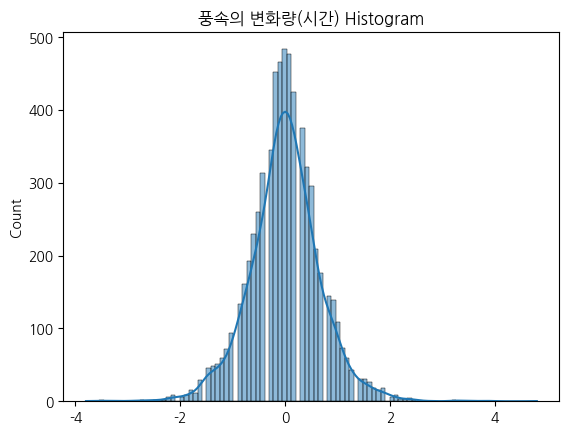

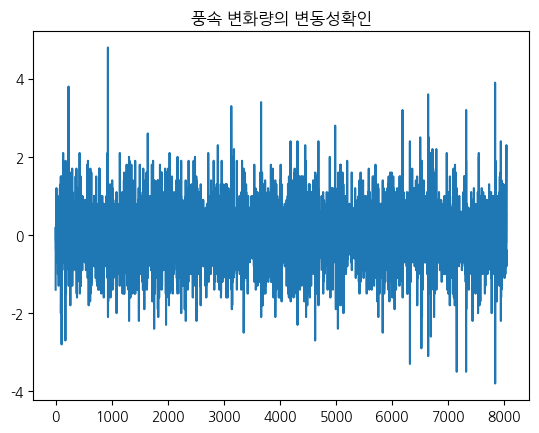

In [15]:
wind_diff = []
wind_diff.append(np.nan) #첫행은 앞에 값이 없으므로 결측치 처리
for i in range(1, len(df)):
    diff = df['Wind speed (m/s)'][i] - df['Wind speed (m/s)'][i - 1]
    wind_diff.append(diff) 
sns.histplot(wind_diff, kde=True) #분포확인 -> 정규분포 미쳤다리
plt.rcParams['axes.unicode_minus'] = False #축에 마이너스 표시가 안되는 점 조정
plt.title('풍속의 변화량(시간) Histogram')
plt.show()
sns.lineplot(df.index,wind_diff) #변동성 확인
plt.title('풍속 변화량의 변동성확인')
plt.show()

In [16]:
print('wind_diff의 결측치 수: ',np.isnan(wind_diff).sum()) #전,후 값중 하나라도 NA이면 결측치가 되므로 거의 두배의 결측치가 나옴(연속NA인것도 있어서 거의..)
wind_diff_std = np.nanstd(wind_diff)
print('풍속 변화량의 표준편차: ', wind_diff_std) #표준편차는 이정도(결측치 제외한 값들의 표준편차)
print('생성할 난수 예시: ', np.random.normal(loc=0, scale=wind_diff_std, size=1)) #이렇게 난수생성할 예정

wind_diff의 결측치 수:  1511
풍속 변화량의 표준편차:  0.6820213252499085
생성할 난수 예시:  [1.23938245]


In [17]:
np.random.seed(100) #seed 설정
for i in range(1, len(df)):
    if pd.isna(df.loc[i, 'Wind speed (m/s)']):
        random_value = np.random.normal(loc=0, scale=wind_diff_std, size=1)
        df.loc[i, 'Wind speed (m/s)'] = df.loc[i-1, 'Wind speed (m/s)'] + random_value
print('Wind speed (m/s)열의 결측치 수: ', df['Wind speed (m/s)'].isna().sum()) #완료!

Wind speed (m/s)열의 결측치 수:  0


In [18]:
print('데이터프레임 내 총 결측치 수: ', df.isna().sum().sum()) #전체 결측치 처리 완료 !!

데이터프레임 내 총 결측치 수:  0


# 파생변수 생성

In [19]:
df2 = df.copy()

## 날씨
눈/비가 온날(강우량이 0보다 큰 날)의 IQR을 기준으로 가벼운 눈/비, 심한 눈/비로 구분
<br>호우주의보 등의 기준으로 하고자 했지만, 대부분 기준이 3시간이라 IQR이용

### boxplot확인
맑지 않은날. 강수, 강설량이 0보다 큰 날

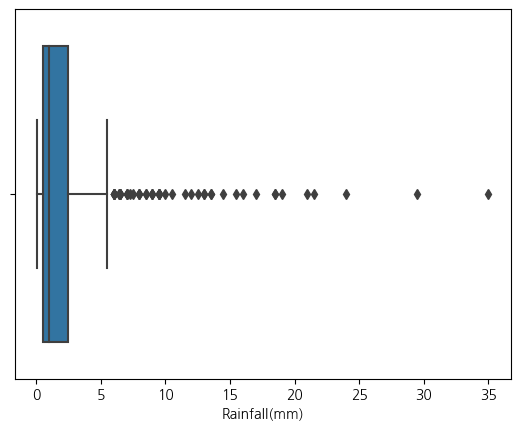

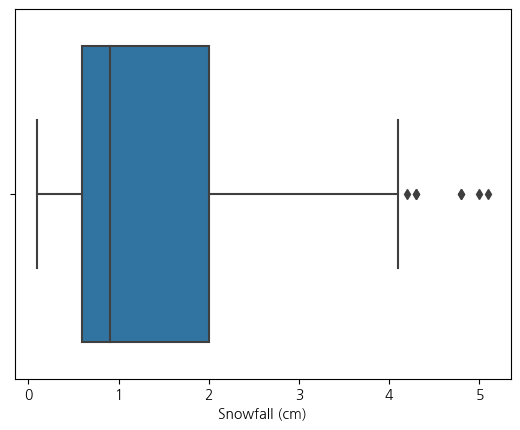

In [20]:
rain = df2['Rainfall(mm)'][df2['Rainfall(mm)']>0]
snow = df2['Snowfall (cm)'][df2['Snowfall (cm)']>0]
sns.boxplot(rain)
plt.show()
sns.boxplot(snow)
plt.show()

### IQR을 기준으로 기준점 생성

In [21]:
Q1_rain = rain.quantile(0.25)
Q3_rain = rain.quantile(0.75)
IQR_rain = Q3_rain - Q1_rain
rain_upper_bound = Q3_rain + 1.5 * IQR_rain

Q1_snow = snow.quantile(0.25)
Q3_snow = snow.quantile(0.75)
IQR_snow = Q3_snow - Q1_snow
snow_upper_bound = Q3_snow + 1.5 * IQR_snow

print(rain_upper_bound, snow_upper_bound)

5.5 4.1


### Weather 변수 추가
눈과 비가 동시에 오는 날 확인

In [22]:
 #눈과 비가 같이오는 시간을 확인했을 때 모두 겨울이므로 눈이 오는 날로 처리
print('눈과 비가 같이오는 날의 계절: ', df2[(df2['Rainfall(mm)']>0)& (df2['Snowfall (cm)']>0)]['Seasons'].unique())

display(df2[(df2['Rainfall(mm)']>0) & (df2['Snowfall (cm)']>snow_upper_bound)]) #눈이 많이 온 날 중 비가 온 날은 비교적 비가 적으므로 => 눈 온 날로
display(df2[(df2['Rainfall(mm)']>rain_upper_bound) & (df2['Snowfall (cm)']>0)])#비가 많이 온 날 중 눈이 온 날은 없음.

눈과 비가 같이오는 날의 계절:  ['Winter']


,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
225,2017-12-10,31,9,0.200000,90,1.0,305,-1.2,0.00,1.6,4.3,Winter,No Holiday,Yes
420,2017-12-18,62,12,-1.366667,83,1.2,351,-4.3,0.09,1.1,5.1,Winter,No Holiday,Yes


,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day


In [23]:
df2['Weather'] = 'Clear' #Weather라는 변수 추가
df2.loc[(df2['Rainfall(mm)'] > 0), 'Weather'] = 'Rain'
df2.loc[(df2['Snowfall (cm)'] > 0), 'Weather'] = 'Snow'
df2.loc[(df2['Rainfall(mm)'] > rain_upper_bound), 'Weather'] = 'Downpour'
df2.loc[(df2['Snowfall (cm)'] > snow_upper_bound), 'Weather'] = 'Blizzard'
df2['Weather'].value_counts()

Clear       7163
Rain         433
Snow         385
Downpour      52
Blizzard       7
Name: Weather, dtype: int64

## 요일

In [24]:
df2['Day_of_Week'] = df2['Date'].dt.day_name()
df2['Day_of_Week'].value_counts()

Friday       1152
Saturday     1152
Sunday       1152
Monday       1152
Tuesday      1152
Wednesday    1152
Thursday     1128
Name: Day_of_Week, dtype: int64

## 날짜 변수
기존의 Date변수를 모델에 적용하기 위해 int형으로 변환이 필요.
<br> 정보를 적절히 활용하기 위해 년, 월, 일로 분리해 year, month, day변수로 변환

In [25]:
df2['year'] = df2.Date.dt.year
df2['month'] = df2.Date.dt.month
df2['day'] = df2.Date.dt.day

## 완료
날씨, 날짜 변수는 기존 변수를 변환한 것이므로 Rainfall, Snowfall, Date열 삭제
<br>요일 변수는 기존 변수로부터 새로운 정보를 만들어낸 것이므로 유지

In [26]:
df2.drop(['Rainfall(mm)','Snowfall (cm)','Date'],axis=1, inplace=True)
df2.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Seasons,Holiday,Functioning Day,Weather,Day_of_Week,year,month,day
0,254,0,-5.2,37,2.200000,2000,-17.6,0.0,Winter,No Holiday,Yes,Clear,Friday,2017,12,1
1,204,1,-5.5,38,0.800000,2000,-17.6,0.0,Winter,No Holiday,Yes,Clear,Friday,2017,12,1
2,173,2,-6.0,39,1.000000,2000,-17.7,0.0,Winter,No Holiday,Yes,Clear,Friday,2017,12,1
3,107,3,-6.2,40,0.900000,2000,-17.6,0.0,Winter,No Holiday,Yes,Clear,Friday,2017,12,1
4,78,4,-6.0,36,-0.293377,2000,-18.6,0.0,Winter,No Holiday,Yes,Clear,Friday,2017,12,1


# EDA
지난 과제를 기반으로 필요한 것만 이용

## 상관관계 확인

### 전체 수치형 변수들의 상관관계

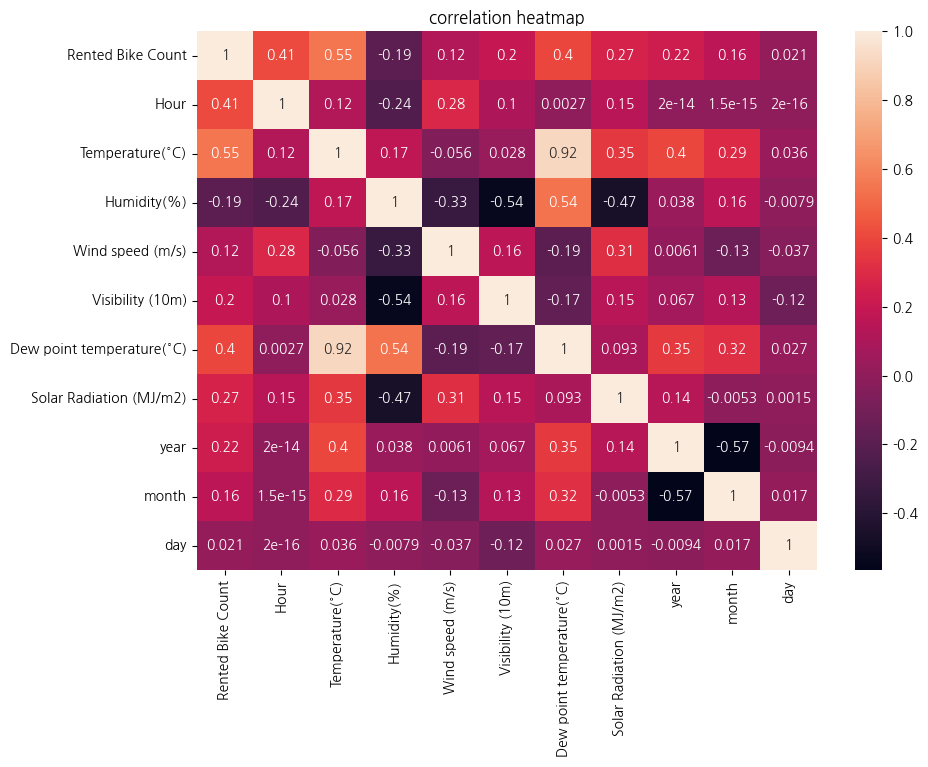

In [27]:
plt.figure(figsize=(10,7))
sns.heatmap(df2.corr(),annot = True)
plt.title('correlation heatmap')
plt.show()

### 높은 애들만 추려서 확인
지난 과제 때는 0.45를 기준으로 했지만, 지나치게 높았다고 판단. 
<br> -> 0.3을 기준으로 확인하되, 상황에 맞게 판단

Text(0.5, 1.0, 'correlation heatmap(abs(corr)>0.3)')

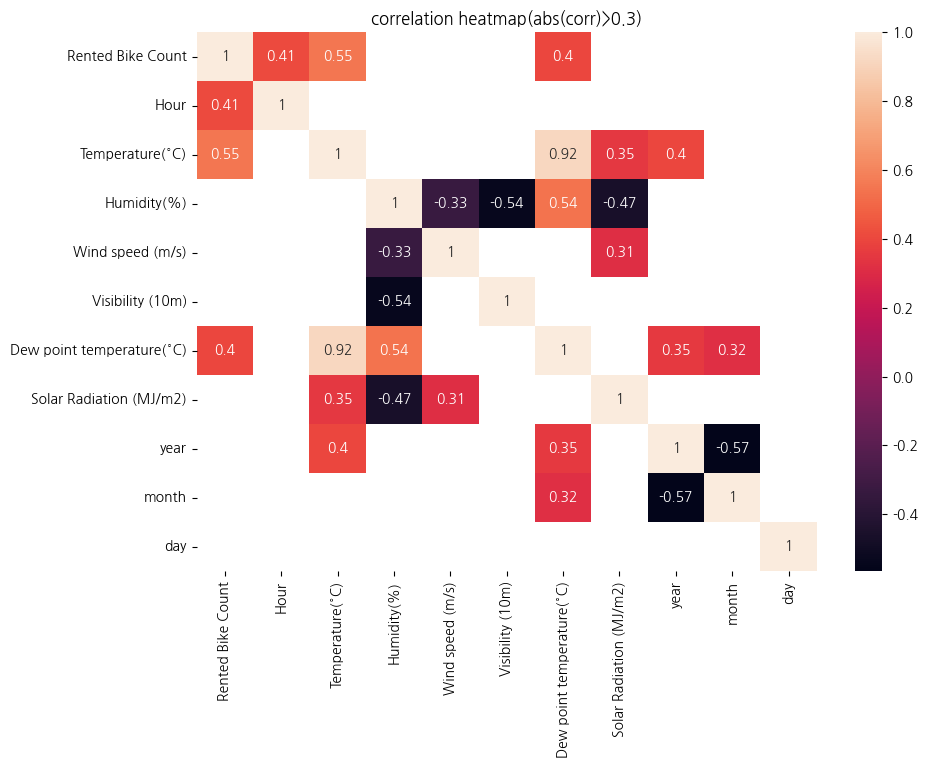

In [28]:
plt.figure(figsize=(10,7))
sns.heatmap(df2.corr()[0.3<df2.corr().abs()],annot = True)
plt.title('correlation heatmap(abs(corr)>0.3)')
#대여수와 Hour, Temperature(°C), Dew point temperature(°C)가 그나마 높은 상관성을 보임(선형관계 만족)

## 문자형 변수들과 대여수
boxplot확인

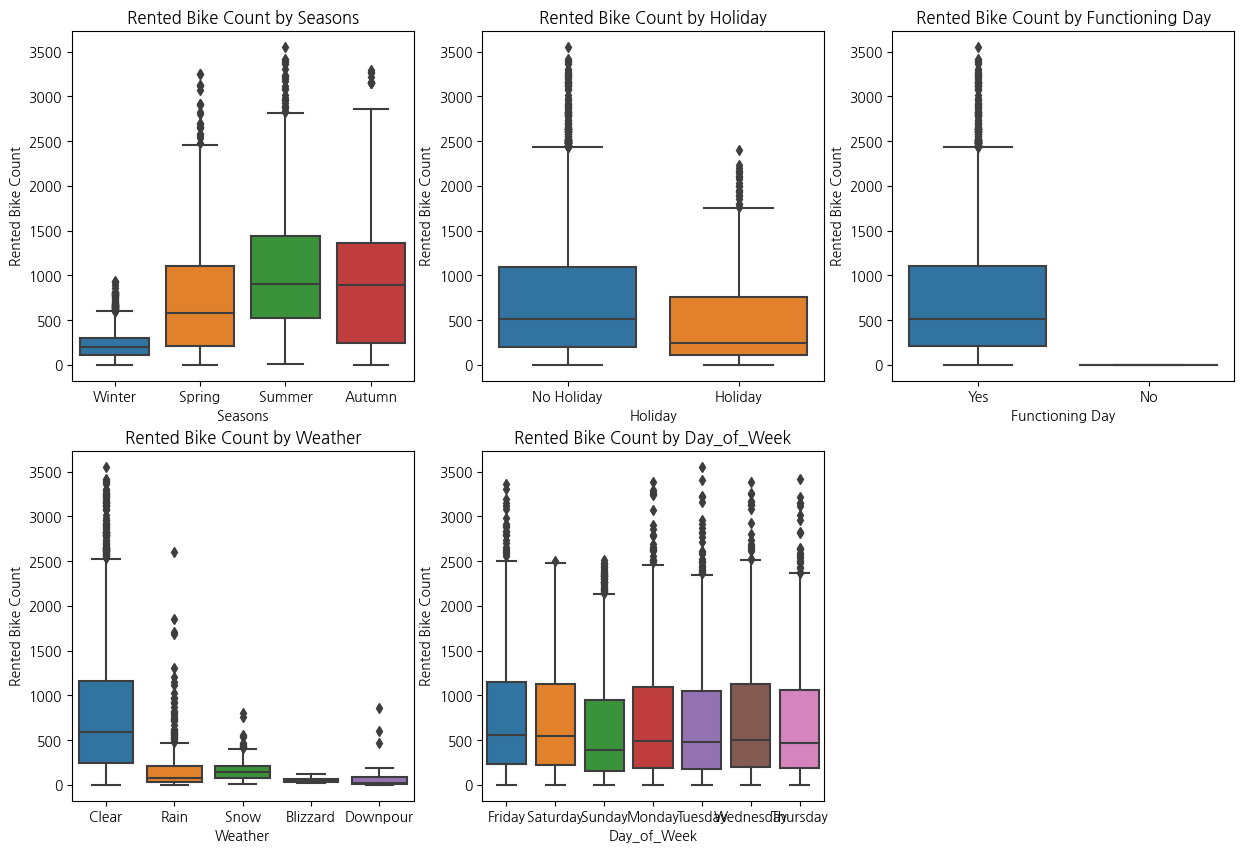

In [29]:
columns_to_plot = ['Seasons', 'Holiday', 'Functioning Day', 'Weather', 'Day_of_Week']
plt.figure(figsize=(15, 10))
for column in columns_to_plot:
    plt.subplot(2, 3, columns_to_plot.index(column) + 1)
    sns.boxplot(x=column, y='Rented Bike Count', data=df2)
    plt.title(f'Rented Bike Count by {column}') #비오는날 대여수에 이상치로 볼만한 애가 하나 있는 것 같기도?

## 이산형 변수들과 대여수
평균 대여수 barplot

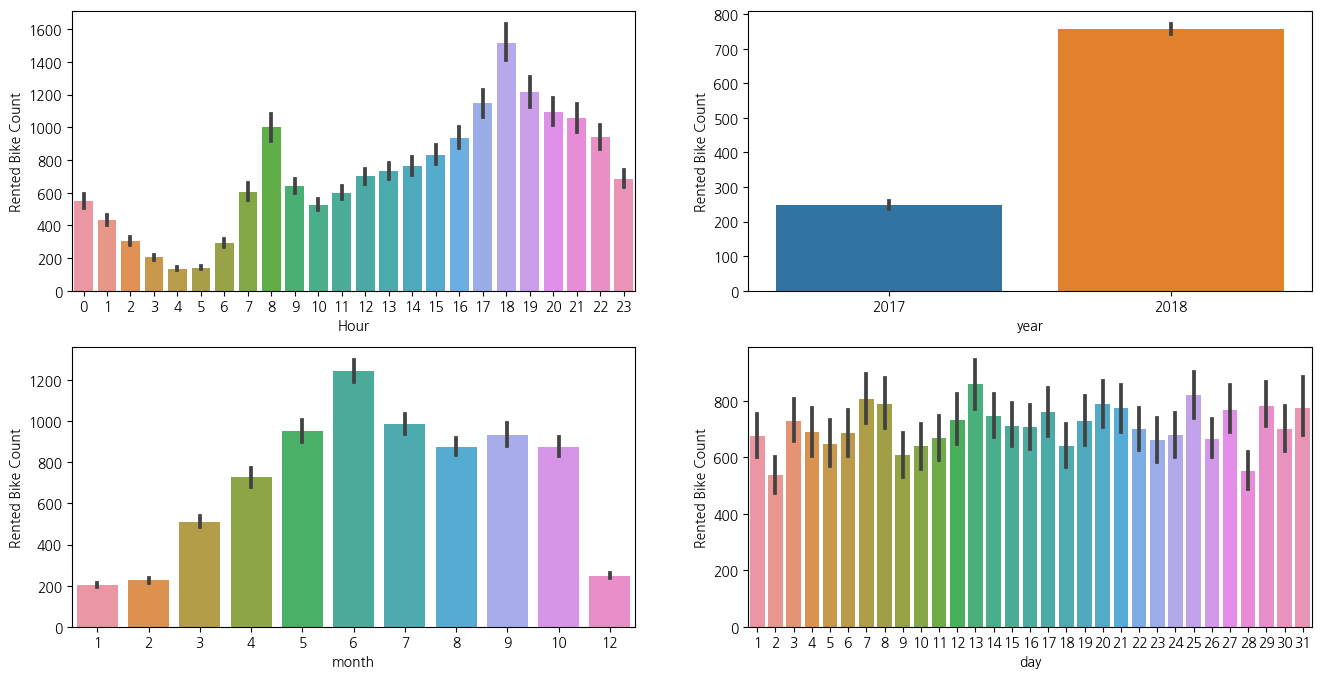

In [30]:
fig, axs = plt.subplots(figsize=(16, 8), ncols=2, nrows=2)
cat_features = ['Hour', 'year', 'month', 'day']
# cat_features에 있는 모든 칼럼별로 개별 칼럼값에 따른 count의 합을 barplot으로 시각화
for i, feature in enumerate(cat_features):
    row = int(i/2)
    col = i%2
    # 시본의 barplot을 이용해 칼럼값에 따른 count의 평균값을 표현
    sns.barplot(x=feature, y='Rented Bike Count', data=df2, ax=axs[row][col])

## 연속형 변수들과 대여수
regplot 이용

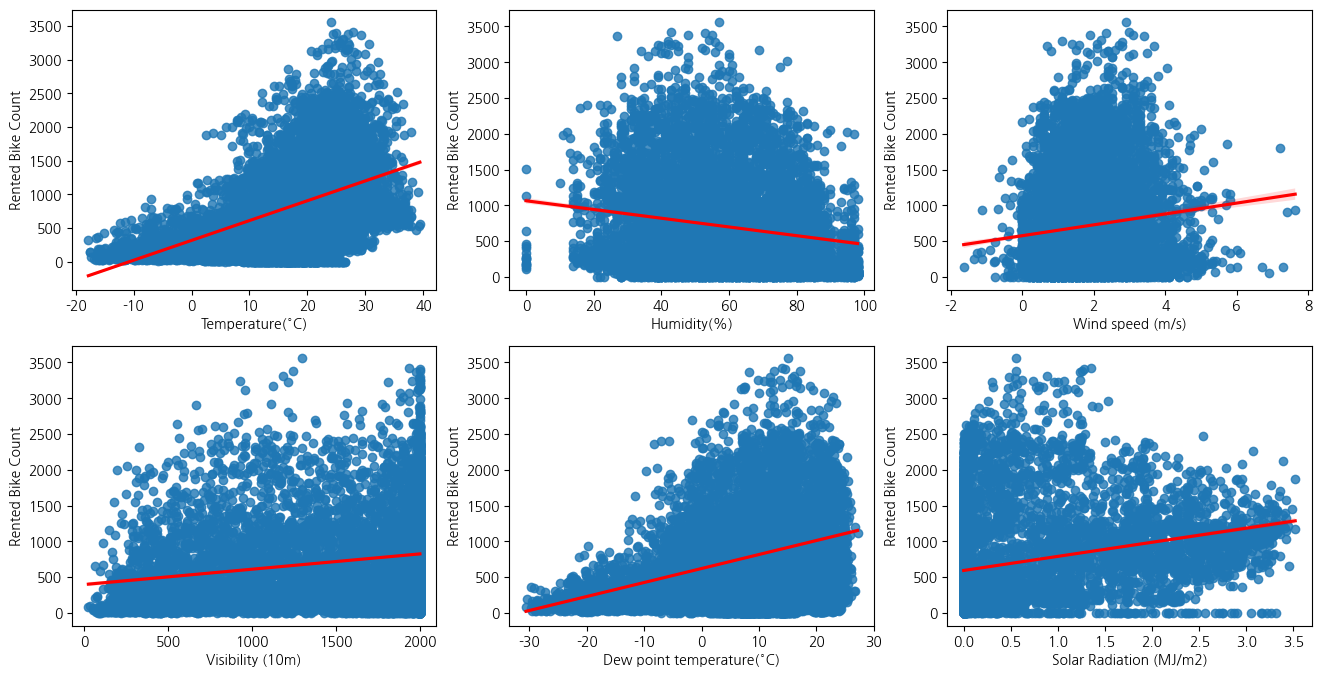

In [31]:
fig, axs = plt.subplots(figsize=(16,8) , ncols=3 , nrows=2)
lm_features = ['Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)']
for i , feature in enumerate(lm_features):
    row = int(i/3)
    col = i%3
    sns.regplot(x=feature , y='Rented Bike Count',data=df2 , ax=axs[row][col],line_kws={'color': 'red'})

## Dew point temperature(°C) 변수 삭제
독립변수들 간의 상관성이 눈에 거슬림. 특히 이슬점온도와 기온
<br>이슬점 온도는 기온과 습도로 결정되므로, 이슬점 온도가 변수로 들어간다면 기온와 습도가 이중으로 작용한다고 볼 수 있음 => 과감히 삭제
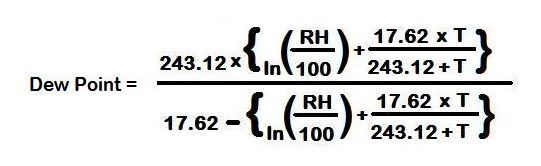
T: 온도, RH: 습도

In [32]:
df2.drop('Dew point temperature(°C)',axis=1,inplace=True)

# 인코딩

## 라벨 인코딩(Holiday, Functioning Day)
반대의 의미를 지닌 변수들이기에 라벨인코딩 적용

In [33]:
df2['Holiday'] = df2['Holiday'].map({'No Holiday':1,'Holiday':0}) #No Holiday에 대여수가 더 높았으므로 양의 상관관계를 주기위해 이렇게 매핑
df2['Functioning Day'] = df2['Functioning Day'].map({'Yes':1,'No':0})
df2.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Seasons,Holiday,Functioning Day,Weather,Day_of_Week,year,month,day
0,254,0,-5.2,37,2.200000,2000,0.0,Winter,1,1,Clear,Friday,2017,12,1
1,204,1,-5.5,38,0.800000,2000,0.0,Winter,1,1,Clear,Friday,2017,12,1
2,173,2,-6.0,39,1.000000,2000,0.0,Winter,1,1,Clear,Friday,2017,12,1
3,107,3,-6.2,40,0.900000,2000,0.0,Winter,1,1,Clear,Friday,2017,12,1
4,78,4,-6.0,36,-0.293377,2000,0.0,Winter,1,1,Clear,Friday,2017,12,1


## 원핫 인코딩(Seasons, weather, Day_of_Week)
각각의 값이 각자의 의미를 지니고 있기에 원핫 인코딩 적용

In [34]:
oh_encoder = OneHotEncoder(sparse=False)
df_ohe = oh_encoder.fit_transform(df2[['Seasons','Weather','Day_of_Week']])
df_ohe = pd.DataFrame(df_ohe, columns=oh_encoder.get_feature_names_out(['Seasons','Weather','Day_of_Week']))
df_ohe

,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Weather_Blizzard,Weather_Clear,Weather_Downpour,Weather_Rain,Weather_Snow,Day_of_Week_Friday,Day_of_Week_Monday,Day_of_Week_Saturday,Day_of_Week_Sunday,Day_of_Week_Thursday,Day_of_Week_Tuesday,Day_of_Week_Wednesday
0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8035,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8036,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8037,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8038,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [35]:
df2.drop(['Seasons','Weather','Day_of_Week'],axis=1,inplace=True)
df2 = pd.concat([df2, df_ohe], axis=1)
df2.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Holiday,Functioning Day,year,...,Weather_Downpour,Weather_Rain,Weather_Snow,Day_of_Week_Friday,Day_of_Week_Monday,Day_of_Week_Saturday,Day_of_Week_Sunday,Day_of_Week_Thursday,Day_of_Week_Tuesday,Day_of_Week_Wednesday
0,254,0,-5.2,37,2.200000,2000,0.0,1,1,2017,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,204,1,-5.5,38,0.800000,2000,0.0,1,1,2017,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,173,2,-6.0,39,1.000000,2000,0.0,1,1,2017,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,107,3,-6.2,40,0.900000,2000,0.0,1,1,2017,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,78,4,-6.0,36,-0.293377,2000,0.0,1,1,2017,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


## 결과 확인

In [36]:
pd.set_option('display.max_columns', 30)
pd.set_option('display.max_row', 30)
display(df2.describe())
df2.info()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Holiday,Functioning Day,year,month,day,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Weather_Blizzard,Weather_Clear,Weather_Downpour,Weather_Rain,Weather_Snow,Day_of_Week_Friday,Day_of_Week_Monday,Day_of_Week_Saturday,Day_of_Week_Sunday,Day_of_Week_Thursday,Day_of_Week_Tuesday,Day_of_Week_Wednesday
count,8040.000000,8040.000000,8040.000000,8040.000000,8040.000000,8040.000000,8040.000000,8040.000000,8040.000000,8040.000000,8040.000000,8040.000000,8040.000000,8040.000000,8040.000000,8040.000000,8040.000000,8040.000000,8040.000000,8040.000000,8040.000000,8040.000000,8040.000000,8040.000000,8040.000000,8040.000000,8040.000000,8040.000000
mean,709.775995,11.500000,13.340005,58.271020,1.749508,1459.170896,0.587072,0.946269,0.972264,2017.907463,6.125373,15.740299,0.182090,0.274627,0.274627,0.268657,0.000871,0.890920,0.006468,0.053856,0.047886,0.143284,0.143284,0.143284,0.143284,0.140299,0.143284,0.143284
std,657.320605,6.922617,12.290211,20.340492,1.068725,603.716284,0.886186,0.225501,0.164227,0.289801,3.316712,8.809025,0.385942,0.446354,0.446354,0.443289,0.029496,0.311758,0.080166,0.225747,0.213537,0.350384,0.350384,0.350384,0.350384,0.347318,0.350384,0.350384
min,0.000000,0.000000,-17.800000,0.000000,-1.642200,27.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.145833,43.000000,1.000000,977.000000,0.000000,1.000000,1.000000,2018.000000,3.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,485.000000,11.500000,15.366667,57.000000,1.600000,1741.000000,0.020000,1.000000,1.000000,2018.000000,6.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1080.500000,17.250000,23.200000,74.000000,2.400000,2000.000000,0.960000,1.000000,1.000000,2018.000000,9.000000,23.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.639180,2000.000000,3.520000,1.000000,1.000000,2018.000000,12.000000,31.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8040 entries, 0 to 8039
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8040 non-null   int64  
 1   Hour                     8040 non-null   int64  
 2   Temperature(°C)          8040 non-null   float64
 3   Humidity(%)              8040 non-null   int64  
 4   Wind speed (m/s)         8040 non-null   float64
 5   Visibility (10m)         8040 non-null   int64  
 6   Solar Radiation (MJ/m2)  8040 non-null   float64
 7   Holiday                  8040 non-null   int64  
 8   Functioning Day          8040 non-null   int64  
 9   year                     8040 non-null   int64  
 10  month                    8040 non-null   int64  
 11  day                      8040 non-null   int64  
 12  Seasons_Autumn           8040 non-null   float64
 13  Seasons_Spring           8040 non-null   float64
 14  Seasons_Summer          

# 선형회귀 모델 적용을 위한 전처리
데이터 분리, 로그변환, 스케일링 등

In [37]:
X = df2.drop("Rented Bike Count",axis=1)
y = df2["Rented Bike Count"]
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100) 

## 타겟값(Rented bike Count) 로그변환

In [311]:
y_train_log = np.log1p(y_train)

## 피처 스케일링
0,1의 이산형 변수가 있으므로 MinMaxScaler가 적절할 것으로 판단
<br> 다음 과제 때 모델을 돌려보면서 다양하게 해볼 예정

In [312]:
mms = MinMaxScaler()
X_train_mms = mms.fit_transform(X_train)
X_val_mms = mms.transform(X_val)

## + 피처 로그변환도 가능할듯

# 모델적용
여기부턴 과제 범위가 아니기에 간단히 적용만

## 원래 형태로
스케일링, 로그변환 없이

In [326]:
lr = LinearRegression()
lr.fit(X_train ,y_train)
y_preds = lr.predict(X_val)
mse = mean_squared_error(y_val, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_val, y_preds)))

print('\n절편 값:',lr.intercept_)
print('회귀 계수값:', np.round(lr.coef_, 1))

MSE : 170254.081 , RMSE : 412.619
Variance score : 0.596

절편 값: 766323.2474475384
회귀 계수값: [  28.3   26.3   -7.1   25.1   -0.   -86.4  117.3 1019.2 -380.1  -28.4
   -1.2  322.6   -5.7   59.6 -376.4  249.1  216.4 -452.  -319.1  305.5
   50.5  -28.3  -15.6  -98.1   24.7   13.8   53. ]


## 종속변수 로그변환 적용

In [328]:
lr = LinearRegression()
lr.fit(X_train ,y_train_log)
y_preds = lr.predict(X_val)
y_preds = np.expm1(y_preds)
mse = mean_squared_error(y_val, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_val, y_preds)))

print('\n절편 값:',lr.intercept_)
print('회귀 계수값:', np.round(lr.coef_, 1))
print(X_train.columns)

MSE : 176013.412 , RMSE : 419.540
Variance score : 0.582

절편 값: 1084.597158959086
회귀 계수값: [ 0.   0.  -0.   0.  -0.  -0.   0.4  6.6 -0.5 -0.  -0.   0.5  0.   0.1
 -0.6  0.   1.1 -1.5 -0.6  0.9  0.1 -0.1 -0.  -0.2  0.1  0.1  0.1]
Index(['Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Holiday',
       'Functioning Day', 'year', 'month', 'day', 'Seasons_Autumn',
       'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter',
       'Weather_Blizzard', 'Weather_Clear', 'Weather_Downpour', 'Weather_Rain',
       'Weather_Snow', 'Day_of_Week_Friday', 'Day_of_Week_Monday',
       'Day_of_Week_Saturday', 'Day_of_Week_Sunday', 'Day_of_Week_Thursday',
       'Day_of_Week_Tuesday', 'Day_of_Week_Wednesday'],
      dtype='object')


## 독립변수 스케일링 적용

In [315]:
lr = LinearRegression()
lr.fit(X_train_mms ,y_train)
y_preds = lr.predict(X_val_mms)
mse = mean_squared_error(y_val, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_val, y_preds)))

print('\n절편 값:',lr.intercept_)
print('회귀 계수값:', np.round(lr.coef_, 1)) #아무것도 적용하지 않았을 때와 MSE, RMSE, R2 score가 동일하네.. 왜지?(스케일링이 의미없는 건가)

MSE : 170254.081 , RMSE : 412.619
Variance score : 0.596

절편 값: -780.0456610590494
회귀 계수값: [ 649.9 1495.5 -697.3  232.6  -29.1 -304.   117.3 1019.2 -380.1 -312.2
  -37.1  322.6   -5.7   59.6 -376.4  249.1  216.4 -452.  -319.1  305.5
   50.5  -28.3  -15.6  -98.1   24.7   13.8   53. ]
